# <p align="center">Python In Reservoir Analytics</p>




*An introductory exploration of Python's applications in reservoir analytics*

-----
- 1. Simple OOIP Calculator | Automation with Gradio
- 2. Reservoir Production Time Series Analysis | Multiple wells plots | Moving Averages
- 3. Reservoir Pressure Density Maps
- 4. 2D Contour Mapping for Porosity | Saturation
- 5. 3D Mapping for Formation Depth | Porosity | Water-Oil Contact
- 6. Well Log Visualization
- 7. Interactive 3D Horizon Surface ***
- 8. Interactive 3D Reservoir Terrain Plots | Grid Construction ***

-----
Author: Hilaloudine Azeez




## Import Labraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr
import openpyxl as xls

import warnings
warnings.filterwarnings('ignore')

The Original Oil In Place (OOIP) can be calculated using the formula:

$$
OOIP = \frac{7758 \times A \times h \times \phi \times S_{\text{wi}}}{B_{\text{oi}}}
$$

Where:
- $ OOIP:  $ is the Original Oil In Place (in barrels)
- $ 7758:  $ is a conversion factor to convert acre-feet to barrels
- $A:  $ is the area of the reservoir (in acres)
- $h:  $ is the thickness of the reservoir (in feet)
- $\phi:  $ is the porosity of the reservoir (in decimal form)
- $S_{\text{wi}}:  $ is the initial water saturation of the reservoir (in decimal form)
- $B_{\text{oi}}:  $ is the initial oil formation volume factor (in reservoir barrels per stock tank barrel)


In [27]:
A = 785
h = 562
phi = 0.25
Swi = 0.65
Boi = 1.05
OOIP = (7758 * A * h * phi * Swi) / Boi


In [28]:
def calculate_ooip(A, h, phi, Swi, Boi):
    OOIP = (7758 * A * h * phi * Swi) / Boi
    return np.round(OOIP, 3) 


In [29]:
calculate_ooip(895, 425, 0.36, 0.54, 1.09)

np.float64(526297737.798)

In [30]:
iface = gr.Interface(fn=calculate_ooip,
                     inputs=[
                         gr.Number(list(range(1,1001)), label='Area of the reservoir'),
                         gr.Number(list(range(1,1001)), label='The thickness of the reservoir'),
                         gr.Slider(0.1, 0.7, value=0.2, label='Porosity'),
                         gr.Slider(0, 1, value=0.5, label='Initial water saturation'),
                         gr.Slider(0.6, 1.9, value=0.3, label='Initial oil formation volume factor'),
                         ],
                     outputs=gr.Textbox(label= 'Original Oil In Place'),
                     title='Original Oil In Place (OOIP) Calculator',
                     description='Calculate OOIP using the given inputs',
                     )
iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


## 2- Reservoir Production Time Series Analytics

In [31]:
data = pd.read_excel(r'E:\HILAL\project\Reservoir analytics done by Hilal\Datasets\Datasets\GasDataset.xlsx', sheet_name='Sheet1')
data

,Date,GasRate
0,Date,Gas (scf)
1,2019-11-08 00:00:00,0
2,2019-11-12 00:00:00,0
3,2019-11-13 00:00:00,0
4,2019-11-15 00:00:00,0
...,...,...
599,2021-07-04 00:00:00,4342.23
600,2021-07-05 00:00:00,4337.73
601,2021-07-06 00:00:00,4339.02
602,2021-07-07 00:00:00,4329.42


In [32]:
data.head()

,Date,GasRate
0,Date,Gas (scf)
1,2019-11-08 00:00:00,0
2,2019-11-12 00:00:00,0
3,2019-11-13 00:00:00,0
4,2019-11-15 00:00:00,0


In [33]:
ds = data.copy()
ds.shape

(604, 2)

In [34]:
# Filter off the first raw that is causing problem .
ds = ds[1:]
ds

,Date,GasRate
1,2019-11-08 00:00:00,0
2,2019-11-12 00:00:00,0
3,2019-11-13 00:00:00,0
4,2019-11-15 00:00:00,0
5,2019-11-18 00:00:00,0
...,...,...
599,2021-07-04 00:00:00,4342.23
600,2021-07-05 00:00:00,4337.73
601,2021-07-06 00:00:00,4339.02
602,2021-07-07 00:00:00,4329.42


In [35]:
ds.dtypes

Date       object
GasRate    object
dtype: object

In [36]:
ds.describe()

,Date,GasRate
count,603,603
unique,603,585
top,2019-11-08 00:00:00,0
freq,1,17


In [37]:
ds = ds[['Date', 'GasRate']]
ds.head()

,Date,GasRate
1,2019-11-08 00:00:00,0
2,2019-11-12 00:00:00,0
3,2019-11-13 00:00:00,0
4,2019-11-15 00:00:00,0
5,2019-11-18 00:00:00,0


In [38]:
# Ensure that datasets are in the right format/data type.
ds['Date']=pd.to_datetime(ds['Date'])


ds['GasRate'] = ds['GasRate'].astype(float)
print(ds.dtypes)

Date       datetime64[ns]
GasRate           float64
dtype: object


In [39]:
# Visualize unique reservoir names.
ds['Date'].nunique()

603

In [40]:
ds['GasRate'].nunique()

585

In [41]:
reservoir_ds = ds.copy()
reservoir_ds = reservoir_ds.groupby(['Date'])[['GasRate']].sum().reset_index()
print (reservoir_ds.shape)
reservoir_ds.head()

(603, 2)


,Date,GasRate
0,2019-11-08,0.0
1,2019-11-12,0.0
2,2019-11-13,0.0
3,2019-11-15,0.0
4,2019-11-18,0.0


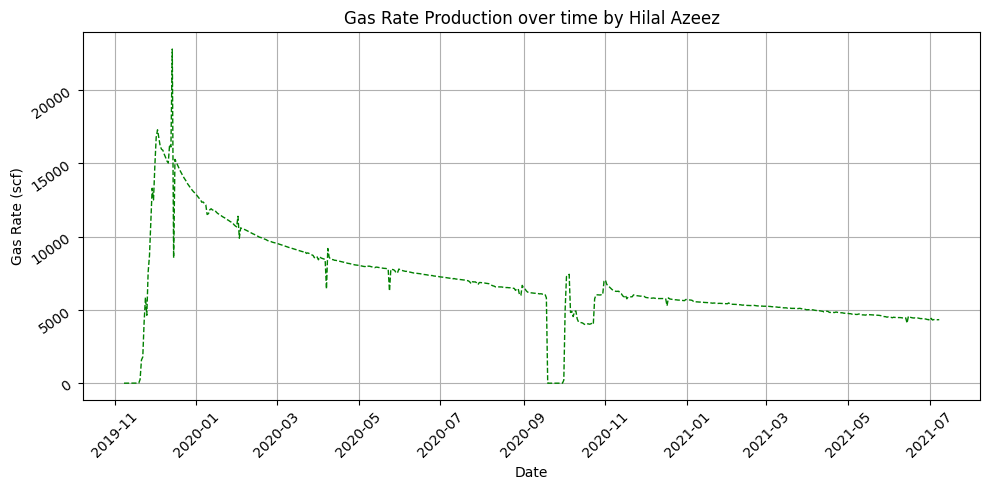

In [42]:
# Initialize the canvas.
plt.figure(figsize=(10,5))

# Make the plot
plt.plot(reservoir_ds['Date'], reservoir_ds['GasRate'], linestyle='--', color='green', linewidth=1)

# Configure or customize the plot
plt.title('Gas Rate Production over time by Hilal Azeez')

plt.xlabel('Date')
plt.ylabel('Gas Rate (scf)')
plt.xticks(rotation=45)
plt.yticks(rotation=35)
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

## Making Plots


In [43]:
# Rempving zero values.
reservoir_1_nz = reservoir_ds[reservoir_ds['GasRate'] > 0]

# sort by date
reservoir_1_nz.sort_values(by='Date', inplace=True)

reservoir_1_nz.shape

(586, 2)

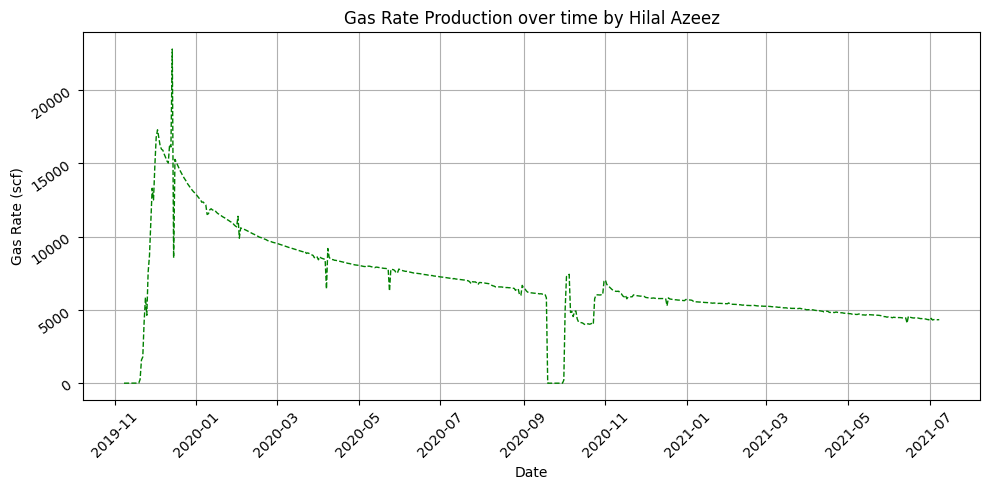

In [44]:
# Initialize the canvas.
plt.figure(figsize=(10,5))

# Make the plot
plt.plot(reservoir_ds['Date'], reservoir_ds['GasRate'], linestyle='--', color='green', linewidth=1)

# Configure or customize the plot
plt.title('Gas Rate Production over time by Hilal Azeez')

plt.xlabel('Date')
plt.ylabel('Gas Rate (scf)')
plt.xticks(rotation=45)
plt.yticks(rotation=35)
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [45]:
# Making plot with plotly
import plotly.express as px
import plotly.graph_objects as go


In [46]:
fig = px.line(reservoir_1_nz, x='Date', y='GasRate', title= ('Gas Rate Production over time'), labels={'GasRate':'Gas rate (scf)', 'Date':'Date'})

fig.show()

In [47]:
import nbformat as nb
import plotly.io as pio
from plotly.subplots import make_subplots

In [48]:
# Initialize the canvas.
fig = make_subplots(rows=1, cols=1)

# Make the plot
trace = go.Scatter(x=reservoir_1_nz['Date'], y=reservoir_1_nz['GasRate'], mode='lines', name='GasRate')
fig.add_trace(trace)

# Configure or customize the plot
fig.update_layout(title = 'Gas Production Rate over time by Hilal Azeez', 
                   xaxis_title = 'Date', 
                   yaxis_title='Gas rate in scf', 
                   template = 'ggplot2',
                   xaxis=dict(rangeslider=dict(visible=True))
                   )


# Show the plot
fig.show()